#Importação dos dados, treinamentos e resultados dos modelos

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "/content/dataset_tipo_1.csv"
dataset = pd.read_csv(path)

dataset

,ts,CondutividadeEletrica,Temperatura,pH,NivelBoiaBaixa,NivelBoiaAlta,Dia,tipo_alface,Quant_folhas,Altura_folha,Comprimento_folha,Id_alface
0,2024-12-31T17:43:37.826000Z,810,30.06,7.17,1,1,1,Crespa Verde,6,5.1,2.8,1
1,2024-12-31T17:43:22Z,800,30.06,7.24,1,1,1,Crespa Roxo,7,3.8,2.5,2
2,2024-12-31T17:42:50.262000Z,813,30.00,7.18,1,1,1,Crespa Verde,7,3.8,2.1,3
3,2024-12-31T17:42:34.491000Z,806,30.06,7.16,1,1,1,Crespa Roxo,6,3.8,2.8,4
4,2024-12-31T17:42:02.669000Z,806,30.06,7.17,1,1,1,Crespa Verde,7,4.0,2.8,5
...,...,...,...,...,...,...,...,...,...,...,...,...
993,2025-01-19T18:15:37.306000Z,1787,28.81,7.16,1,0,20,Crespa Roxo,9,7.0,5.9,4
994,2025-01-19T18:15:05.593000Z,1812,28.75,7.16,1,0,20,Crespa Verde,8,6.5,5.0,5
995,2025-01-19T18:14:49.730000Z,1854,28.75,7.16,1,0,20,Crespa Roxo,7,6.5,6.7,6
996,2025-01-19T18:14:18.020000Z,1910,28.81,7.15,1,0,20,Crespa Verde,8,6.5,5.0,5


In [3]:
dataset = pd.read_csv(path)

#Criação do dataframe pandas para os resultados
dict_new = {"Modelo": [0],
            "MSE": [0],
            "RMSE": [0],
            "R2_score": [0],
            "Id_alface": [0]
            }

dados = pd.DataFrame(dict_new)

In [4]:
for i in range(0, 6):
  df_alface = dataset.loc[dataset.Id_alface == i + 1]

  X = df_alface.drop(["ts", "NivelBoiaBaixa", "NivelBoiaAlta", "Quant_folhas", "Altura_folha", "Comprimento_folha", "Id_alface", "tipo_alface"], axis = 1)

  #Seleção do Target
  y = df_alface["Quant_folhas"]
  #y = df_alface["Altura_folha"]
  #y = df_alface["Comprimento_folha"]

  colunas = X.columns
  x = X.values
  x_scale = MinMaxScaler().fit_transform(x)

  #Feactures noramlizadas para treinamento dos modelos
  x_normalizado = pd.DataFrame(data = x_scale, columns = colunas)

  #Listas para guardar os resultados dos modelos
  linear_results = {
      "MSE": [],
      "RMSE": [],
      "R2_score": []
  }

  tree_results = {
      "MSE": [],
      "RMSE": [],
      "R2_score": []
  }

  knn_results = {
      "MSE": [],
      "RMSE": [],
      "R2_score": []
  }

  randomforest_results = {
      "MSE": [],
      "RMSE": [],
      "R2_score": []
  }

  boosting_results = {
      "MSE": [],
      "RMSE": [],
      "R2_score": []
  }

  svr_results = {
      "MSE": [],
      "RMSE": [],
      "R2_score": []
  }

  #Treinamentos dos modelos varias vezes
  for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(x_normalizado, y, test_size = 0.2, random_state = None)

    regressor1=LinearRegression()
    regressor1.fit(X_train,y_train)
    result = regressor1.predict(X_test)
    linear_results["MSE"].append(metrics.mean_squared_error(y_test,result))
    linear_results["RMSE"].append(np.sqrt(metrics.mean_squared_error(y_test, result)))
    linear_results["R2_score"].append(regressor1.score(X_test,y_test))

    regressor2=DecisionTreeRegressor(criterion='squared_error', max_depth=5)
    regressor2.fit(X_train,y_train)
    result = regressor2.predict(X_test)
    tree_results["MSE"].append(metrics.mean_squared_error(y_test, result))
    tree_results["RMSE"].append(np.sqrt(metrics.mean_squared_error(y_test, result)))
    tree_results["R2_score"].append(regressor2.score(X_test,y_test))

    regressor3=KNeighborsRegressor(n_neighbors=3, metric='euclidean', algorithm='brute')
    regressor3.fit(X_train, y_train)
    result = regressor3.predict(X_test)
    knn_results["MSE"].append(metrics.mean_squared_error(y_test, result))
    knn_results["RMSE"].append(np.sqrt(metrics.mean_squared_error(y_test, result)))
    knn_results["R2_score"].append(regressor3.score(X_test,y_test))

    regressor4 = RandomForestRegressor() #(criterion = 'squared_error', max_depth = 7)
    regressor4.fit(X_train, y_train)
    result = regressor4.predict(X_test)
    randomforest_results["MSE"].append(metrics.mean_squared_error(y_test, result))
    randomforest_results["RMSE"].append(np.sqrt(metrics.mean_squared_error(y_test, result)))
    randomforest_results["R2_score"].append(regressor4.score(X_test,y_test))

    regressor5 = GradientBoostingRegressor()
    regressor5.fit(X_train, y_train)
    result = regressor5.predict(X_test)
    boosting_results["MSE"].append(metrics.mean_squared_error(y_test, result))
    boosting_results["RMSE"].append(np.sqrt(metrics.mean_squared_error(y_test, result)))
    boosting_results["R2_score"].append(regressor5.score(X_test,y_test))

    regressor6 = SVR(kernel = "poly", degree = 2) #, gamma="auto", C = 1.0)
    regressor6.fit(X_train, y_train)
    result = regressor6.predict(X_test)
    svr_results["MSE"].append(metrics.mean_squared_error(y_test, result))
    svr_results["RMSE"].append(np.sqrt(metrics.mean_squared_error(y_test, result)))
    svr_results["R2_score"].append(regressor6.score(X_test,y_test))

  #Adiconando ao dataframe que vai gerar o gráfico
  dados.loc[len(dados)] = {"Modelo": "MultipleLinear", "MSE": np.mean(linear_results["MSE"]), "RMSE": np.mean(linear_results["RMSE"]), "R2_score": np.mean(linear_results["R2_score"]), "Id_alface": i + 1}
  dados.loc[len(dados)] = {"Modelo": "SuportVector", "MSE": np.mean(svr_results["MSE"]), "RMSE": np.mean(svr_results["RMSE"]), "R2_score": np.mean(svr_results["R2_score"]), "Id_alface": i + 1}
  dados.loc[len(dados)] = {"Modelo": "DecisionTree", "MSE": np.mean(tree_results["MSE"]), "RMSE": np.mean(tree_results["RMSE"]), "R2_score": np.mean(tree_results["R2_score"]), "Id_alface": i + 1}
  dados.loc[len(dados)] = {"Modelo": "KNN", "MSE": np.mean(knn_results["MSE"]), "RMSE": np.mean(knn_results["RMSE"]), "R2_score": np.mean(knn_results["R2_score"]), "Id_alface": i + 1}
  dados.loc[len(dados)] = {"Modelo": "RandonForest", "MSE": np.mean(randomforest_results["MSE"]), "RMSE": np.mean(randomforest_results["RMSE"]), "R2_score": np.mean(randomforest_results["R2_score"]), "Id_alface": i + 1}
  dados.loc[len(dados)] = {"Modelo": "GradienBoosting", "MSE": np.mean(boosting_results["MSE"]), "RMSE": np.mean(boosting_results["RMSE"]), "R2_score": np.mean(boosting_results["R2_score"]), "Id_alface": i + 1}

dados = dados.drop([0])

#Visualização dos resultados por meio de gráficos

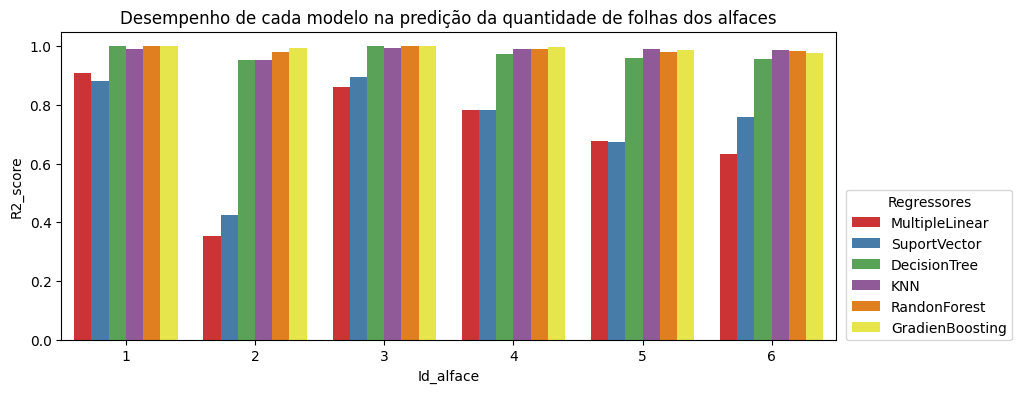

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para Quantidade de Folhas por Dia, agrupado por ID de Alface
plt.figure(figsize=(10, 4))
sns.barplot(data=dados, x='Id_alface', y='R2_score', hue='Modelo', palette='Set1') #palette = 'Blues'
plt.title('Desempenho de cada modelo na predição da quantidade de folhas dos alfaces')
plt.xlabel('Id_alface')
plt.ylabel('R2_score')
plt.legend(title='Regressores', loc='lower center', bbox_to_anchor=(1.12, -0.025))

#for p in plt.gca().patches:
#    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                       ha='center', va='center', fontsize=10, color='black', fontweight='bold')

plt.grid(False)
plt.show()

In [6]:
dados

,Modelo,MSE,RMSE,R2_score,Id_alface
1,MultipleLinear,2.837006e-01,0.530789,0.909320,1
2,SuportVector,3.768507e-01,0.606043,0.881470,1
3,DecisionTree,0.000000e+00,0.000000,1.000000,1
4,KNN,3.501684e-02,0.162287,0.989410,1
5,RandonForest,1.015455e-03,0.024159,0.999661,1
6,GradienBoosting,2.343117e-09,0.000048,1.000000,1
7,MultipleLinear,3.420685e-01,0.583251,0.354592,2
8,SuportVector,3.003061e-01,0.544636,0.423987,2
9,DecisionTree,2.319117e-02,0.075593,0.951760,2
10,KNN,2.571895e-02,0.144293,0.952800,2


<ipython-input-7-8d576664ad6e>:4: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dados, x='Id_alface', y='MSE', hue='Modelo', style='Modelo', markers='o',dashes=[], color='purple')
<ipython-input-7-8d576664ad6e>:4: UserWarning: 
The dashes list has fewer values (0) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dados, x='Id_alface', y='MSE', hue='Modelo', style='Modelo', markers='o',dashes=[], color='purple')


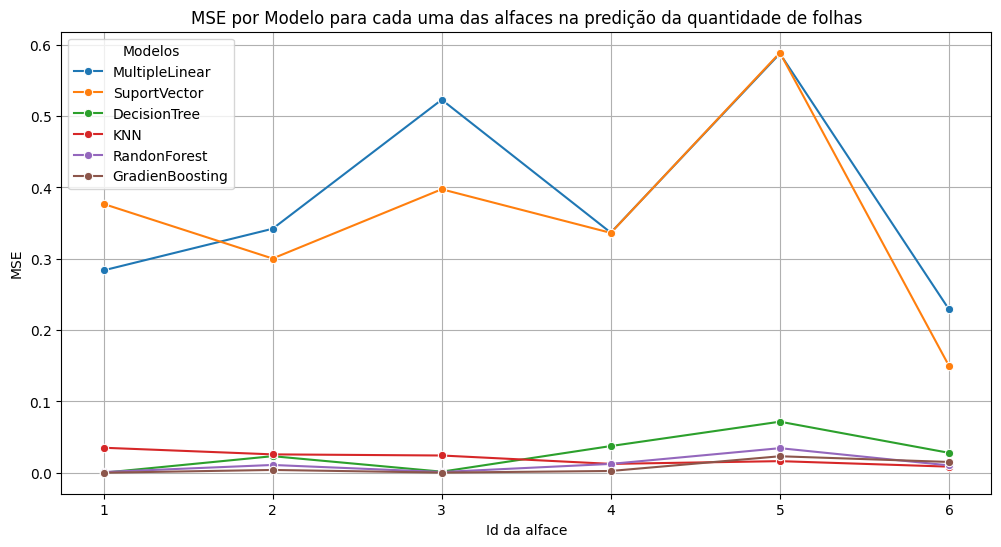

In [7]:
# Criando gráfico de linha
plt.figure(figsize=(12, 6))
#sns.lineplot(data=dados, x='Id_alface', y='MSE', hue='Modelo', style='Modelo', markers=True, palette='Set2')
sns.lineplot(data=dados, x='Id_alface', y='MSE', hue='Modelo', style='Modelo', markers='o',dashes=[], color='purple')

plt.title('MSE por Modelo para cada uma das alfaces na predição da quantidade de folhas')
plt.xlabel('Id da alface')
plt.ylabel('MSE')
plt.legend(title='Modelos')

plt.grid(True)
plt.show()

<ipython-input-9-de16f42cd85e>:4: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dados, x='Id_alface', y='RMSE', hue='Modelo', style='Modelo', markers='o',dashes=[], color='purple')
<ipython-input-9-de16f42cd85e>:4: UserWarning: 
The dashes list has fewer values (0) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dados, x='Id_alface', y='RMSE', hue='Modelo', style='Modelo', markers='o',dashes=[], color='purple')


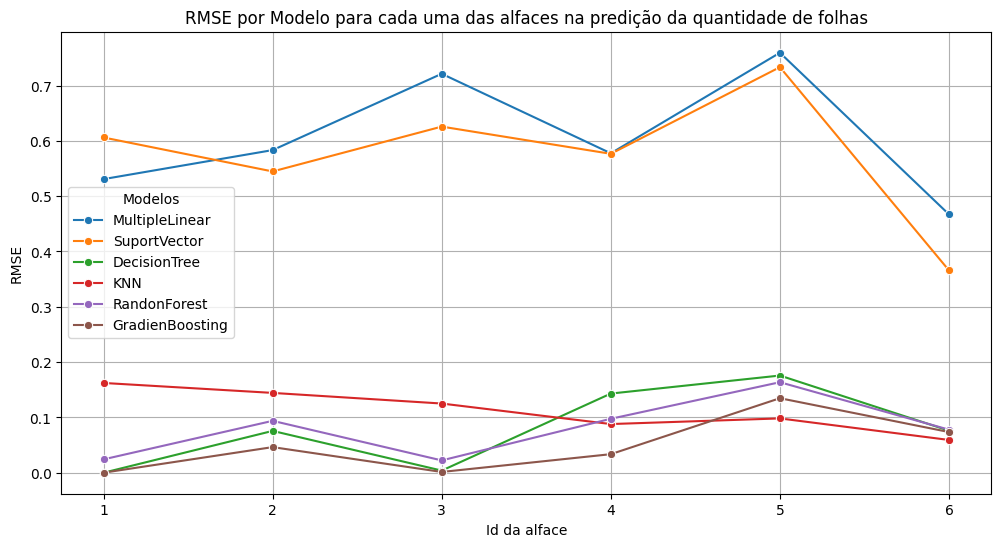

In [9]:
# Criando gráfico de linha
plt.figure(figsize=(12, 6))
#sns.lineplot(data=dados, x='Id_alface', y='MSE', hue='Modelo', style='Modelo', markers=True, palette='Set2')
sns.lineplot(data=dados, x='Id_alface', y='RMSE', hue='Modelo', style='Modelo', markers='o',dashes=[], color='purple')

plt.title('RMSE por Modelo para cada uma das alfaces na predição da quantidade de folhas')
plt.xlabel('Id da alface')
plt.ylabel('RMSE')
plt.legend(title='Modelos')

plt.grid(True)
plt.show()

In [ ]:
dataset.describe()

,CondutividadeEletrica,Temperatura,pH,NivelBoiaBaixa,NivelBoiaAlta,Dia,Quant_folhas,Altura_folha,Comprimento_folha,Id_alface
count,998.000000,998.000000,998.000000,998.000000,998.00000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,1310.090180,28.602465,7.624790,0.993988,0.58517,10.654309,7.362725,5.805210,4.950200,3.501002
std,343.993711,0.727148,0.531963,0.077343,0.49294,5.368818,1.937513,1.310399,1.263092,1.699460
min,800.000000,27.380000,6.250000,0.000000,0.00000,1.000000,5.000000,3.500000,2.100000,1.000000
25%,1039.250000,28.000000,7.400000,1.000000,0.00000,6.000000,6.000000,5.100000,4.200000,2.000000
50%,1237.500000,28.750000,7.860000,1.000000,1.00000,11.000000,7.000000,5.400000,4.600000,4.000000
75%,1542.000000,29.120000,8.000000,1.000000,1.00000,15.000000,8.000000,6.600000,5.700000,5.000000
max,2169.000000,30.190000,9.530000,1.000000,1.00000,20.000000,12.000000,11.000000,9.000000,6.000000


<ipython-input-11-26a356449503>:4: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=dados, x='Id_alface', y='RMSE', hue='Modelo', style='Modelo', markers='o', color='purple')


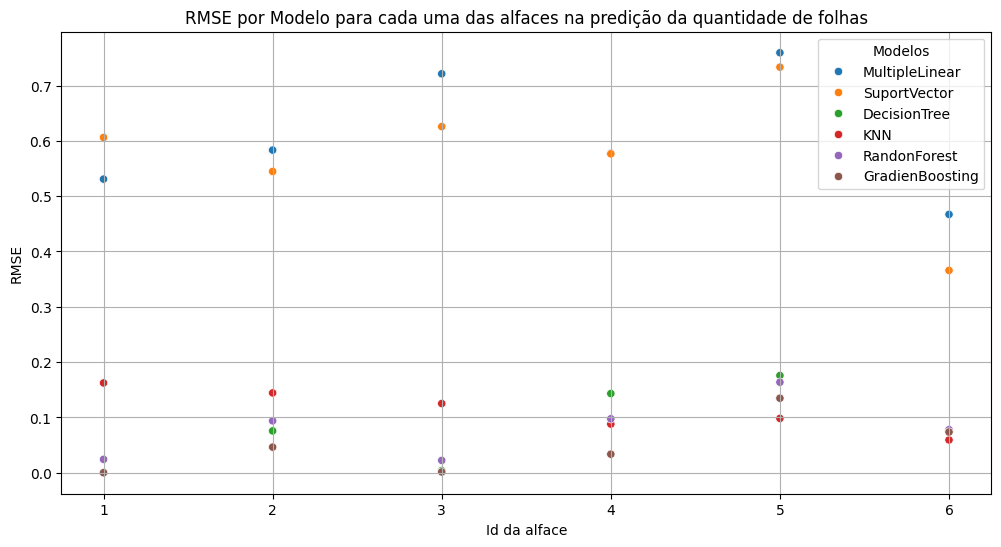

In [11]:
# Criando gráfico de linha
plt.figure(figsize=(12, 6))
#sns.lineplot(data=dados, x='Id_alface', y='MSE', hue='Modelo', style='Modelo', markers=True, palette='Set2')
sns.scatterplot(data=dados, x='Id_alface', y='RMSE', hue='Modelo', style='Modelo', markers='o', color='purple')

plt.title('RMSE por Modelo para cada uma das alfaces na predição da quantidade de folhas')
plt.xlabel('Id da alface')
plt.ylabel('RMSE')
plt.legend(title='Modelos')

plt.grid(True)
plt.show()

<ipython-input-12-bff0e863f79a>:4: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=dados, x='Id_alface', y='MSE', hue='Modelo', style='Modelo', markers='o', color='purple')


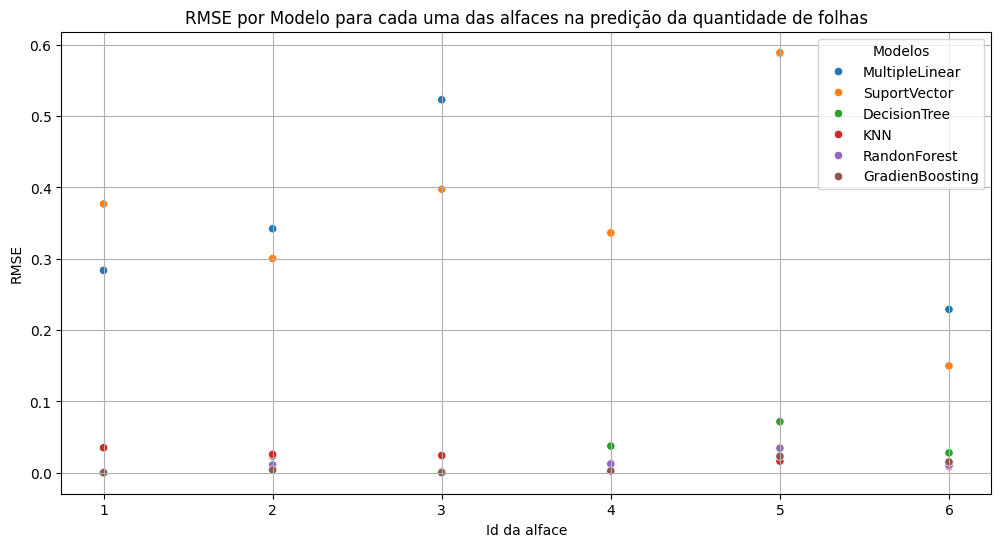

In [12]:
# Criando gráfico de linha
plt.figure(figsize=(12, 6))
#sns.lineplot(data=dados, x='Id_alface', y='MSE', hue='Modelo', style='Modelo', markers=True, palette='Set2')
sns.scatterplot(data=dados, x='Id_alface', y='MSE', hue='Modelo', style='Modelo', markers='o', color='purple')

plt.title('RMSE por Modelo para cada uma das alfaces na predição da quantidade de folhas')
plt.xlabel('Id da alface')
plt.ylabel('RMSE')
plt.legend(title='Modelos')

plt.grid(True)
plt.show()

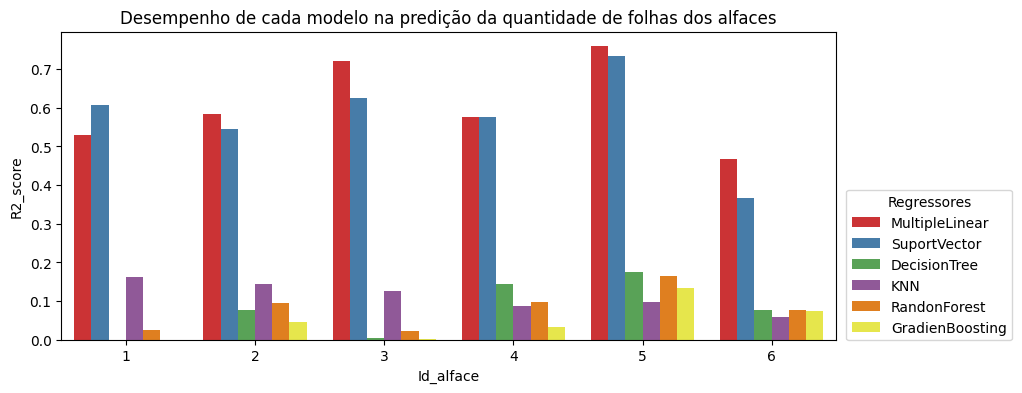

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para Quantidade de Folhas por Dia, agrupado por ID de Alface
plt.figure(figsize=(10, 4))
sns.barplot(data=dados, x='Id_alface', y='RMSE', hue='Modelo', palette='Set1') #palette = 'Blues'
plt.title('Desempenho de cada modelo na predição da quantidade de folhas dos alfaces')
plt.xlabel('Id_alface')
plt.ylabel('R2_score')
plt.legend(title='Regressores', loc='lower center', bbox_to_anchor=(1.12, -0.025))

#for p in plt.gca().patches:
#    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                       ha='center', va='center', fontsize=10, color='black', fontweight='bold')

plt.grid(False)
plt.show()

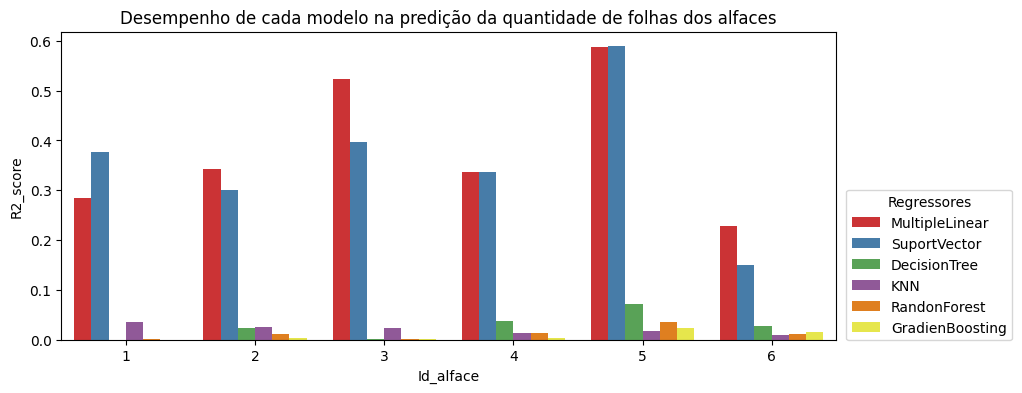

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para Quantidade de Folhas por Dia, agrupado por ID de Alface
plt.figure(figsize=(10, 4))
sns.barplot(data=dados, x='Id_alface', y='MSE', hue='Modelo', palette='Set1') #palette = 'Blues'
plt.title('Desempenho de cada modelo na predição da quantidade de folhas dos alfaces')
plt.xlabel('Id_alface')
plt.ylabel('R2_score')
plt.legend(title='Regressores', loc='lower center', bbox_to_anchor=(1.12, -0.025))

#for p in plt.gca().patches:
#    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                       ha='center', va='center', fontsize=10, color='black', fontweight='bold')

plt.grid(False)
plt.show()